# CubePlot demo

I wrote this for `data` with size: $n\times n \times n$. You can adapt it for arbitrary sizes. I Hope you find it useful.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms  

In [19]:
def CubePlot(region,cmap="bone",color="orange",angle=45,clip=+1):
    vmin, vmax = clip*np.amin(region),clip*np.amax(region)
    
    p = np.shape(region)[0]  
    
    x = np.arange(p)    
    y = x    
    z = x    
    
    nx = len(x)
    ny = len(y)
    nz = len(z)
    
    x0=0
    y0=0
    z0=0
    
    Z1 = region[0,...].T
    Z2 = region[:,0,...].T
    Z3 = region[...,0]
    Z1 = np.flipud(Z1)
    Z2 = np.flipud(Z2)
    
    ny1,nx1 = Z1.shape
    ny2,nx2 = Z2.shape
    ny3,nx3 = Z3.shape  # Time slice

    
    # Angles
    angle_1  = angle 
    angle_2  = 90. - angle_1

    # Scaling
    scale_roof  = np.sin(np.pi*angle_1/180.)*np.cos(np.pi*angle_2/180.)
    scale_depth = scale_roof*np.tan(np.pi*angle_1/180.)



    # Translations
    translate_x_im0, translate_y_im0 = 0,0.0
    translate_x_im1, translate_y_im1 = p-0.5,0 
    translate_x_im2, translate_y_im2 = 0,p-0.5 
    
    
    text_color       = "black"
    slice_color      = color
    text_slice_color = color
    
    fig, ax = plt.subplots(figsize=(5, 5))

    im0  = ax.imshow(Z1, interpolation='none',origin='lower', cmap=cmap,alpha=1,vmin=vmin,vmax=vmax)   
    im1  = ax.imshow(Z2, interpolation='none',origin='lower', cmap=cmap,alpha=1,vmin=vmin,vmax=vmax)
    im2  = ax.imshow(Z3, interpolation='none',origin='lower', cmap=cmap,alpha=1,vmin=vmin,vmax=vmax)
    
    trans_data0 = mtransforms.Affine2D().translate(translate_x_im0,translate_y_im0)
    trans_data1 = mtransforms.Affine2D().scale(scale_depth,1).skew_deg(0., angle_2).translate(translate_x_im1,translate_y_im1)
    trans_data2 = mtransforms.Affine2D().scale(1,scale_roof).skew_deg(angle_1, 0.).translate(translate_x_im2,translate_y_im2) 

    trans_data0 += ax.transData
    trans_data1 += ax.transData
    trans_data2 += ax.transData

    im0.set_transform(trans_data0)
    im1.set_transform(trans_data1)
    im2.set_transform(trans_data2)

    # Slice lines
    x1, x2, y1, y2 = im1.get_extent()
    ax.plot([x1, x2], [nz,nz], slice_color,transform=trans_data1,alpha=0)
    
    ax.axis('off') # remove bounding box    
    return None

I create a 3D tensor with random numbers: 

In [20]:
nx,ny,nz = 100,100,100
data = np.random.normal(size=(nx,ny,nz))

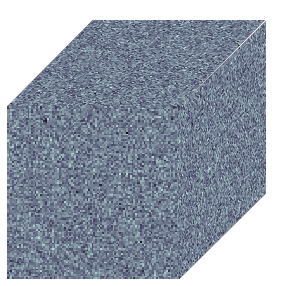

In [21]:
CubePlot(data)

That is all.